In [1]:
!source /opt/anaconda3/bin/activate

In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string 
import operator

In [3]:
barley=pd.read_csv('barley.csv')
#bean=pd.read_csv('bean.csv')
corn_maize=pd.read_csv('corn_maize.csv')
#edamame=pd.read_csv('edamame.csv')
#lentil=pd.read_csv('lentil.csv')
millet=pd.read_csv('millet.csv')
#nut=pd.read_csv('nut.csv')
oat=pd.read_csv('oat.csv')
#pea=pd.read_csv('pea.csv')
potato=pd.read_csv('potato.csv')
quinoa=pd.read_csv('quinoa.csv')
rice=pd.read_csv('rice.csv')
rye=pd.read_csv('rye.csv')
sorghum=pd.read_csv('sorghum.csv')
soybean=pd.read_csv('soybean.csv')
wheat=pd.read_csv('wheat.csv')
legume_nuts_no_peanuts=pd.read_csv('legume_nuts_no_peanuts.csv')
legume_peanuts=pd.read_csv('legume_peanuts.csv')
legume_other=pd.read_csv('legume_other.csv')

In [4]:
wheat.shape

(1392, 25)

In [5]:
wheat.head()

,PROJECT_ID,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,...,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ABSTRACT
0,584433,Anabolism; antiporter; Arabidopsis; Biochemis...,"PHYTONUTRIENT BIOCHEMISTRY, PHYSIOLOGY, AND TR...",USDA,ARS,NaN,ARS-0408087,5/21/2004,3/31/2009,"UPCHURCH, DAN R",...,TX,77030,UNITED STATES,NaN,NaN,10.001,2004,NaN,NaN,Objective(s): 1) Identify and characterize pla...
1,584463,Affect; Biochemical; Bread; Breeding; Carbohy...,ENHANCE HARD SPRING AND DURUM WHEAT QUALITY AN...,USDA,ARS,NaN,ARS-0408465,9/10/2004,7/5/2009,"HARELAND, GARY A",...,ND,58102-2765,UNITED STATES,NaN,NaN,10.001,2004,NaN,NaN,Objective(s): Evaluate the processing and end-...
2,584455,Avena sativa; biosecurity; Breeding; Cereals;...,OBJECTIVE GRADING AND END-USE PROPERTY ASSESSM...,USDA,ARS,NaN,ARS-0408432,9/25/2004,7/5/2009,"PEARSON, THOMAS CLARK",...,KS,66502,UNITED STATES,NaN,NaN,10.001,2004,NaN,NaN,Objective(s): Develop instrumentation and proc...
3,584464,Amino Acids; Amylopectin; Amylose; base; Bioc...,OPTICAL PROPERTIES OF SMALL GRAINS FOR RAPID A...,USDA,ARS,NaN,ARS-0408471,9/15/2004,9/3/2009,"DELWICHE, STEPHEN R",...,MD,20705,UNITED STATES,NaN,NaN,10.001,2004,NaN,NaN,Objective(s): (1) Develop an automated system ...
4,584523,Architecture; Bioinformatics; Cell Wall; Cere...,BIOTECHNOLOGICAL ENHANCEMENT OF ENERGY CROPS,USDA,ARS,NaN,ARS-0408875,8/15/2004,8/14/2009,"ANDERSON, OLIN D",...,CA,94710,UNITED STATES,NaN,NaN,10.001,2004,NaN,NaN,Objective(s): Develop the necessary range of k...


In [6]:
def analysis(dataframe,filename,crop):
    print('total number of projects for '+crop,dataframe.shape[0])
    print('total number of projects with no funding for '+crop,dataframe['FY_TOTAL_COST'].isna().sum())
    
    
    # word count store in csv

    d = dict() 

    # Loop through each line of the file 
    for line in dataframe['PROJECT_TERMS']: 
        # Remove the leading spaces and newline character 
        line = str(line).strip() 

        # Convert the characters in line to  
        # lowercase to avoid case mismatch 
        line = line.lower() 

        # Remove the punctuation marks from the line 
        line = line.translate(line.maketrans("", "", string.punctuation)) 

        # Split the line into words 
        words = line.split(" ") 

        # Iterate over each word in line 
        for word in words: 
            # Check if the word is already in dictionary 
            if word in d: 
                # Increment count of word by 1 
                d[word] = d[word] + 1
            else: 
                # Add the word to dictionary with count 1 
                d[word] = 1
    #Print the contents of dictionary 
    sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
    df = pd.DataFrame.from_dict(sorted_d, orient="index")
    temp=filename+'.csv'
    df.to_csv(temp)
    
    # word cloud
    text = " ".join(str(review) for review in dataframe['PROJECT_TERMS'])
    print ("There are {} words in the combination of ".format(len(text))+crop+" review.")
    
    #stopwords = set(STOPWORDS)
    stopwords=(["wheat", "soy", "maize", "pulses", "legumes","beans","corn","coarse_grains","potato",'pulse',
                      "public health","Research",'United States','study','Research Research','Research Personnel'])

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

    # Display the generated image:
    # the matplotlib way:
    fig = plt.figure(figsize = (10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.show()
    temp=filename+'_count.png'
    plt.savefig(temp)
    plt.close(fig)
    
    # agency wise funcding for each crop
    fig = plt.figure(figsize = (10,10))
    dataframe.groupby(['AGENCY'])['FY_TOTAL_COST'].sum().plot(kind='bar',title='Agency based funding for '+crop,figsize = (10,10))
    #plt.legend()
    #plt.xlabel('Time.year')
    #plt.ylabel('Total number of flights in the range of 1000000')
    temp=filename+'_agency_funding.png'
    plt.savefig(temp)
    plt.close(fig)
    
    # yearly funcding for each crop
    fig = plt.figure(figsize = (10,10))
    dataframe.groupby(['FY'])['FY_TOTAL_COST'].sum().plot(kind='bar',title='Yearly based funding for '+crop,figsize = (10,10))
    temp=filename+'_yearly_funding.png'
    plt.savefig(temp)
    plt.close(fig)
    
    # zero and non-zero projects for each agency and each crop
    print('total projects',dataframe.shape[0])
    print('count of non-zero funded projects',sum(dataframe.groupby(['AGENCY'])['FY_TOTAL_COST'].count().to_list()))
    print('count of zero fundings project',sum(dataframe['FY_TOTAL_COST'].isnull().groupby([dataframe['AGENCY']]).sum().astype(int).to_list()))

    non_zero=dataframe.groupby(['AGENCY'])['FY_TOTAL_COST'].count()
    zero=dataframe['FY_TOTAL_COST'].isnull().groupby([dataframe['AGENCY']]).sum().astype(int)

    df = pd.DataFrame({"Non-Zero Fundings":non_zero,"Zero Funcding":zero})
    fig = plt.figure(figsize = (10,10))
    ax = df.plot.bar(color=["SkyBlue","IndianRed"], title="Agency vs counts for "+crop)
    ax.set_xlabel("Agency")
    ax.set_ylabel("counts")
    #ax.xaxis.set_major_formatter(plt.FixedFormatter(times.strftime("%b %d %Y")))
    #plt.show()
    temp=filename+'_agency_zero_nonzer_funding.png'
    plt.savefig(temp)
    plt.close(fig)
    
    # zero and non-zero duplicates count
    wh=dataframe[dataframe['PROJECT_NUMBER'].duplicated() == True]
    print('Zero funding project in duplicates',wh['FY_TOTAL_COST'].isna().sum())
    print('Non zero funding project in duplicates',len(wh['FY_TOTAL_COST'])-wh['FY_TOTAL_COST'].isna().sum())
    
    print('----')
    print('----')


total number of projects for barley 497
total number of projects with no funding for barley 249
There are 233204 words in the combination of barley review.
total projects 497
count of non-zero funded projects 248
count of zero fundings project 249
Zero funding project in duplicates 54
Non zero funding project in duplicates 37
----
----
total number of projects for corn_maize 2655
total number of projects with no funding for corn_maize 1211
There are 1285673 words in the combination of corn_maize review.
total projects 2655
count of non-zero funded projects 1444
count of zero fundings project 1211
Zero funding project in duplicates 86
Non zero funding project in duplicates 94
----
----
total number of projects for millet 58
total number of projects with no funding for millet 24
There are 32204 words in the combination of millet review.
total projects 58
count of non-zero funded projects 34
count of zero fundings project 24
Zero funding project in duplicates 3
Non zero funding project in

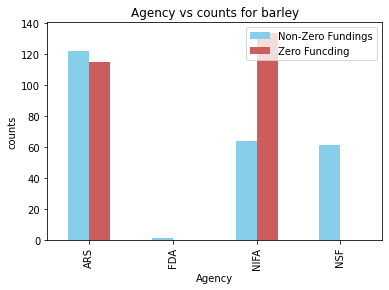

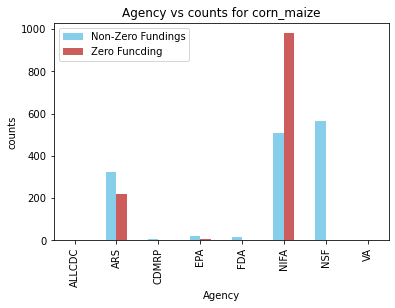

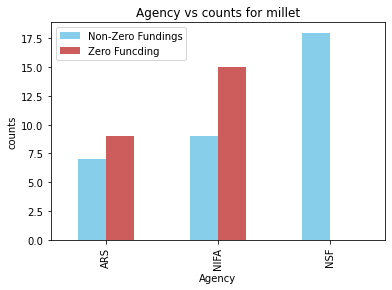

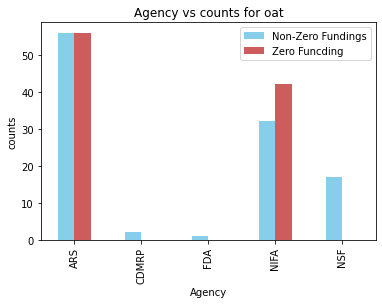

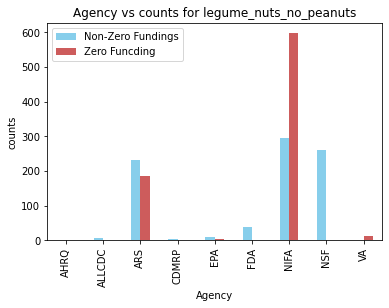

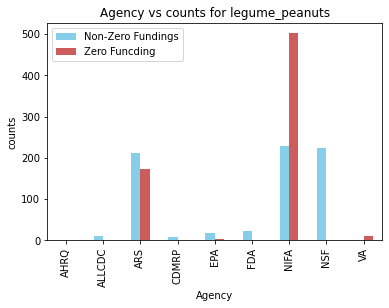

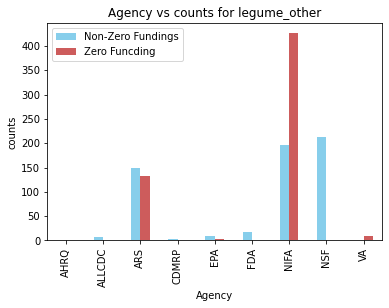

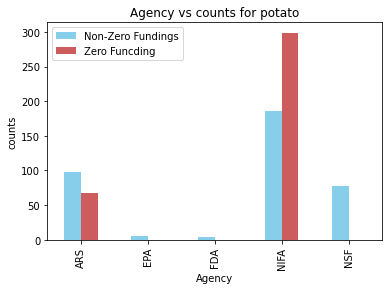

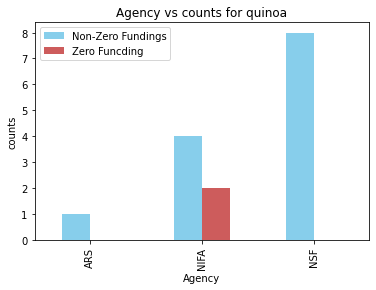

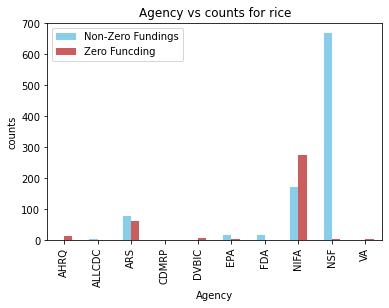

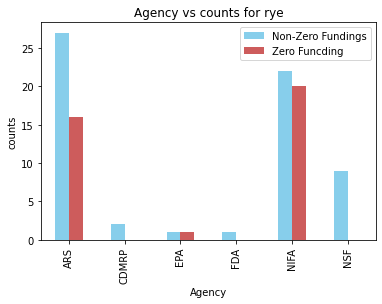

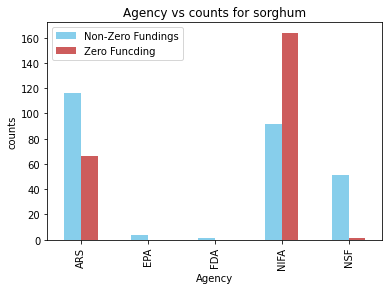

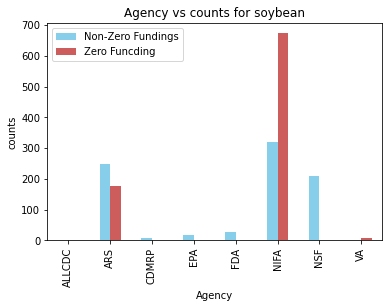

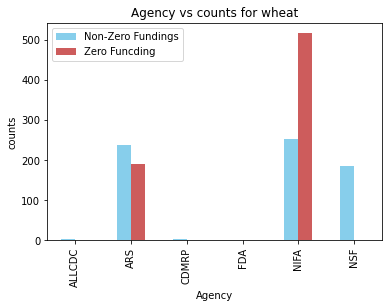

In [8]:
analysis(barley,'figures/barley','barley')
#analysis(bean,'figures/bean','bean')
analysis(corn_maize,'figures/corn_maize','corn_maize')
#analysis(edamame,'figures/edamame','edamame')
#analysis(lentil,'figures/lentil','lentil')
analysis(millet,'figures/millet','millet')
#analysis(nut,'figures/nut','nut')
analysis(oat,'figures/oat','oat')
analysis(legume_nuts_no_peanuts,'figures/legume','legume_nuts_no_peanuts')
analysis(legume_peanuts,'figures/legume','legume_peanuts')
analysis(legume_other,'figures/legume','legume_other')
analysis(potato,'figures/potato','potato')
analysis(quinoa,'figures/quinoa','quinoa')
analysis(rice,'figures/rice','rice')
analysis(rye,'figures/rye','rye')
analysis(sorghum,'figures/sorghum','sorghum')
analysis(soybean,'figures/soybean','soybean')
analysis(wheat,'figures/wheat','wheat')

# Combined analysis for all the crops

In [9]:
data=[barley,corn_maize,millet,oat,legume_nuts_no_peanuts,legume_peanuts,legume_other,potato,quinoa,rice,rye,sorghum,soybean,wheat]
category=['barley','corn_maize','millet','oat','legume_nuts_no_peanuts','legume_peanuts','legume_other','potato','quinoa','rice','rye',
         'sorghum','soybean','wheat']

In [10]:
def all_analysis(data,category):
    d = dict() 
    text=''
    funding=[]
    # word-count in csv
    for dataframe in data:
        for line in dataframe['PROJECT_TERMS']: 
            # Remove the leading spaces and newline character 
            line = str(line).strip() 

            # Convert the characters in line to  
            # lowercase to avoid case mismatch 
            line = line.lower() 

            # Remove the punctuation marks from the line 
            line = line.translate(line.maketrans("", "", string.punctuation)) 

            # Split the line into words 
            words = line.split(" ") 

            # Iterate over each word in line 
            for word in words: 
                # Check if the word is already in dictionary 
                if word in d: 
                    # Increment count of word by 1 
                    d[word] = d[word] + 1
                else: 
                    # Add the word to dictionary with count 1 
                    d[word] = 1
    #Print the contents of dictionary 
        text_temp = " ".join(str(review) for review in dataframe['PROJECT_TERMS'])
        text = text+text_temp
        print ("There are {} words in the combination of all review.".format(len(text)))
        
        funding.append(dataframe['FY_TOTAL_COST'].sum())

    sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
    df = pd.DataFrame.from_dict(sorted_d, orient="index")
    df.to_csv('figures/all_word_count.csv')
    
    #word cloud for all the words
    stopwords=(["wheat", "soy", "maize", "pulses", "legumes","beans","corn","coarse_grains","potato",'pulse',
                      "public health","Research",'United States','study','Research Research','Research Personnel'])

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

    # Display the generated image:
    # the matplotlib way:
    fig = plt.figure(figsize = (10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.show()
    
    plt.savefig('figures/count.png')
    plt.close(fig)
    # total funcidng distribution for all the crops
    fig = plt.figure(figsize = (10,10))
    plt.barh(category,funding)
    
    plt.savefig('figures/total_funding_distribution.png')
    plt.close(fig)

In [11]:
all_analysis(data,category)

There are 233204 words in the combination of all review.
There are 1518877 words in the combination of all review.
There are 1551081 words in the combination of all review.
There are 1656290 words in the combination of all review.
There are 2518674 words in the combination of all review.
There are 3234535 words in the combination of all review.
There are 3841054 words in the combination of all review.
There are 4170800 words in the combination of all review.
There are 4181535 words in the combination of all review.
There are 4937919 words in the combination of all review.
There are 4988302 words in the combination of all review.
There are 5217823 words in the combination of all review.
There are 6036538 words in the combination of all review.
There are 6679853 words in the combination of all review.


In [12]:
# yearly funcding for each crop
import matplotlib.ticker as mticker
i=0
fig = plt.figure(figsize = (10,10))
for dataframe in data:
    dataframe.groupby(['FY'])['FY_TOTAL_COST'].sum().plot(kind='line',label=category[i],figsize = (10,10))
    i+=1
temp='figures/yearly_funding.png'
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend()
plt.savefig(temp)
plt.close(fig)

In [13]:
wheat.shape

(1392, 25)